## Эмпирическая функция распределения. Поведение в точке.

### Цель работы:
- ознакомится с определением ЭФР и ее поведением при фиксированном значении аргумента
- аналитически и графически оценить надежность асимптотического интервала
- убедиться в том, что асимптотические методы работают при конечном объеме выборки

### Задание и ход работы:
 
- Выбрать параметры 2-х из 3-х распределений генеральной совокупности $X$:

> $X$ ~ $U(a, b)$
>
> $X$ ~ $e^u$
>
> $X$ ~ $N(a, \sigma ^2)$ 

- Выбрать такую точку $t_0$, что $ 0.05 < F_X(t_0) < 0.95$. Вычислить $F_X(t_0)$

- Смоделировать $m = 10^2$ выборок объема $n = 10^4$ для каждого из двух выбранных распределений.
- Для каждой выборки построить $F_n(t_0)$ - значение эмпирической функции распределения в точке $t_0$ - оценку значения функции распределения в точке $t_0$, то есть величины $F_X(t_0)$.
- Для каждого из распределений получите 100 оценок величины $F_X(t_0)$.

- Значение функции распределения $\displaystyle F_X(t_0) = P(X \in (-\infty, t_0) = \Delta)$ является вероятностью события $\displaystyle A = {X \in (-\infty, t_0)}.$
- Значение эмпирической функции распределения $F_n(t_0)$ - оценка вероятности события $\displaystyle A = {\displaystyle X \in (-\infty, t_0)}$, то есть $\displaystyle k(\Delta) \over \displaystyle n$ - частота попадания значения случайной величины $X$ в интервал $\Delta$.

> Частота, полученная по серии независимых однотипных испытаний с двумя исходами – $\displaystyle A$ и
$\displaystyle \bar A$, является состоятельной, несмещенной, асимптотически нормальной оценкой
вероятности события.
Свойство асимптотической нормальности позволяет строить
асимптотический доверительный интервал надежности $\gamma$.

- Фиксировать $\displaystyle \gamma > 0.9$ и построить по $\displaystyle 100$ асимптотических доверительных интервалов надежности $\displaystyle \gamma$ для
значения $\displaystyle F_X(t_0)$ для каждого из выбранных распределений.

- Построить $2$ графика – по оси $x$ - номер выборки, по оси $y$ – соответствующие левый и правый концы асимптотических доверительных интервалов и значение $\displaystyle F_X(t_0)$.

- Найти количество $\displaystyle \sigma_n$ асимптотических доверительных интервалов, в которые значение $\displaystyle F_X(t_0)$ не попало. Сравнить среднее количество $\displaystyle \sigma_n$ для $k = 100$ серий $\displaystyle (mean(\sigma_n))$ с величиной $\displaystyle 1 - \gamma$

> $\displaystyle \sigma_n$ можно рассматривать как оценку величины $\displaystyle 1 - \gamma$ для различных $\displaystyle \gamma$ = $\displaystyle 0.9, 0.91, ... , 0.99$.

In [1]:
clear -all
pkg load statistics
pkg load econometrics
graphics_toolkit("gnuplot")


The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are ulikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not be reflected in the graphics properties managed by Octave.  For
example, if the plot window is closed with a mouse click, Octave will not
be notified and will not update it's internal list of open figure windows.
We recommend using the qt toolkit instead.


In [2]:
global m = 10^2;
global n = 10^4;
global t0 = 0.5;
global figure_number = 1;

In [3]:
function f = draw(distribution, gamma = 0.95)
    global m figure_number
    [value, left, right, FX, name] = distribution(gamma);
    f = figure(figure_number++, "position", get(0, "screensize"));
    plot(1:m, left, "k",
         1:m, right, "k",
         1:m, linspace(FX, FX), "r")
    title_name = strcat(name, ": gamma=", num2str(gamma));
    title(title_name);
    xlabel("m")
    ylabel("I")
    pause(0.01);
end

In [4]:
% SE = sigma / sqrt(n)
% F(x) - empirical distribution function(EDF) => sigma^2 = F(t0) * (1 - F(t0))

In [5]:
global mu = 0;
global sigma = 1;

function [value, left, right, FX, name] = normal_distribution(gamma)
    global m n t0 mu sigma;
    T = norminv((1 + gamma) / 2);
    X = normrnd(mu, sigma, n, m);
    FX = normcdf(t0, mu, sigma);
    SE = T * sqrt(FX) * sqrt(1 - FX) / sqrt(n);
    FX_t0 = mean(X < t0);
    left = FX_t0 - SE;
    right = FX_t0 + SE;
    value = 0;
    for i = 1:m
        value += (left(i) > FX || right(i) < FX);
    end
    name = strcat("Normal distribution(", num2str(mu), ", ", num2str(sigma), ")");
end

In [6]:
global u = 2;

function [value, left, right, FX, name] = exponential_distribution(gamma)
    global m n t0 u;
    T = norminv((1 + gamma) / 2);
    X = exprnd(u, n, m);
    FX = expcdf(t0, u);
    SE = T * sqrt(FX) * sqrt(1 - FX) / sqrt(n);
    FX_t0 = mean(X < t0);
    left = FX_t0 - SE;
    right = FX_t0 + SE;
    value = 0;
    for i = 1:m
        value += (left(i) > FX || right(i) < FX);
    end
    name = strcat("Exponential distribution(", num2str(u), ")");
end

In [7]:
function analyse(distribution)
    global m;
    ans = [];
    name = "";
    for gamma = 0.9 : 0.01 : 0.99
        total = [];
        for j = 1:m
            [value, ~, ~, ~, name] = distribution(gamma);
            total(j) = value;
        end
    ans = [ans; gamma, mean(total)];
    end
    printf("%s \n\n", name)
    prettyprint_c(ans, ["Gamma"; "Mean"])
end

In [8]:
analyse(@exponential_distribution)

Exponential distribution(2) 

     Gamma      Mean  
     0.900     9.760
     0.910     8.490
     0.920     8.580
     0.930     6.080
     0.940     6.180
     0.950     4.950
     0.960     3.910
     0.970     2.900
     0.980     1.930
     0.990     0.830


In [9]:
analyse(@normal_distribution)

Normal distribution(0,1) 

     Gamma      Mean  
     0.900     9.590
     0.910     9.160
     0.920     8.200
     0.930     6.600
     0.940     5.920
     0.950     4.690
     0.960     4.110
     0.970     3.110
     0.980     2.020
     0.990     0.940


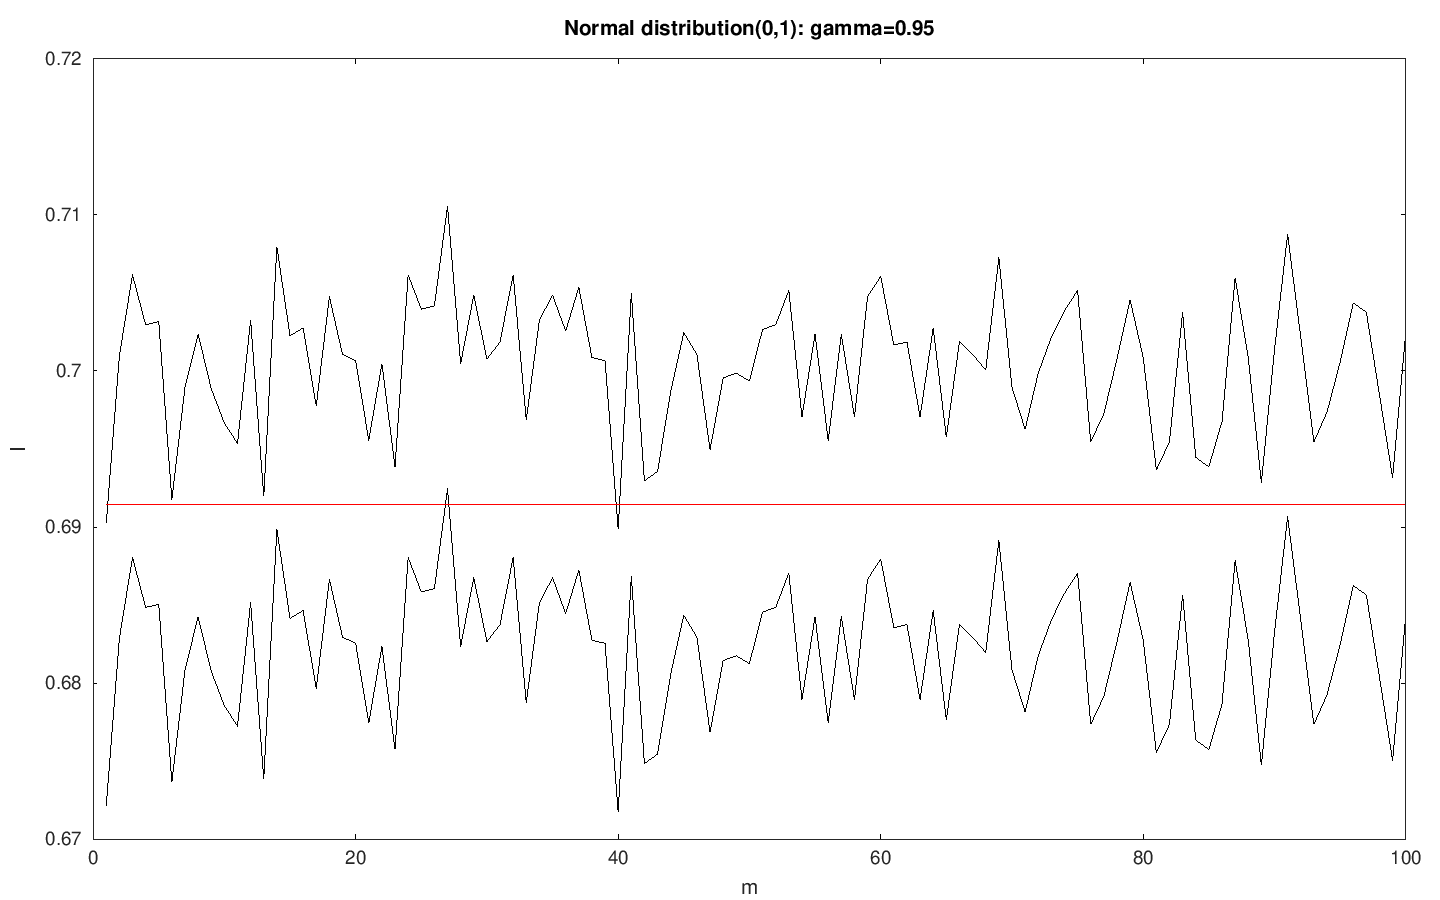

In [10]:
f1 = draw(@normal_distribution);

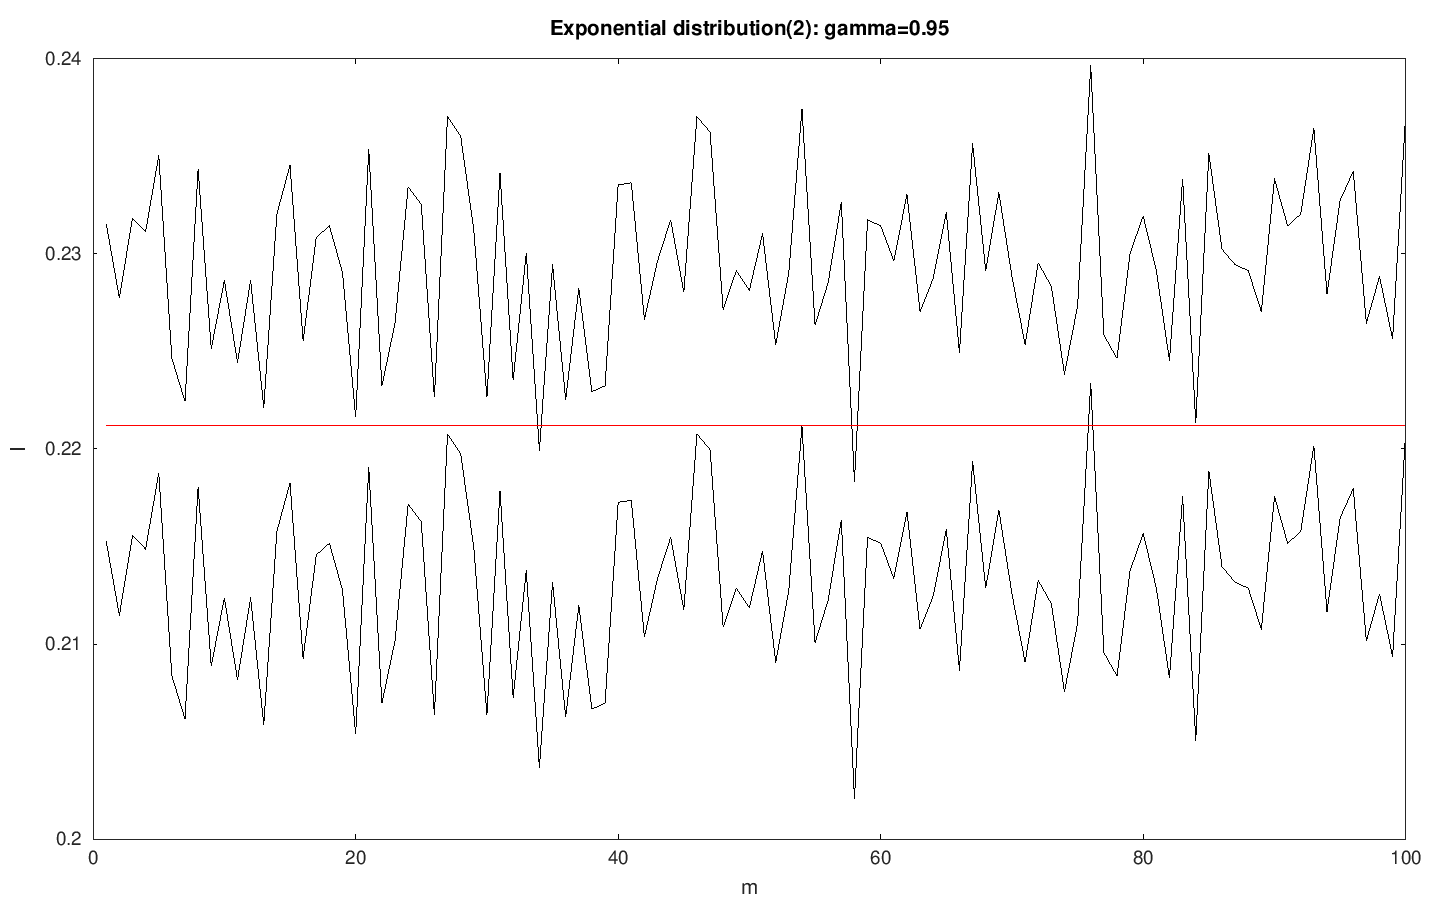

In [11]:
f2 = draw(@exponential_distribution);

### Выводы:
- При увеличении $\gamma$ количество доверительных интервалов, в которые истинное значение не попал уменьшается 
- Увеличивается точность измерений с ростом $\gamma$
> $100 \cdot \gamma + mean() \approx 100$

**Used packages**:
> pkg install -forge struct
>
> pkg install -forge statistics
>
> pkg install -forge optim
>
> pkg install -forge econometrics